In [47]:
# !unzip Registered.zip # unzip your file of images here. 

# update box credentials, imgs_per_line and desired_views before running. 

Archive:  Registered.zip
replace Registered/101reg.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [18]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import datetime
import tqdm
import cv2
import time
import os

from lightfield_utils import load_lightfield_from_paths, resize_lightfield, load_lightfield, save_rendered_views
from lightfield_canvas import DisplayLF

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from boxsdk import DevelopmentClient, OAuth2, Client
from boxsdk.network.default_network import DefaultNetwork
import shutil


# Define client ID, client secret, and developer token.
CLIENT_ID = None
CLIENT_SECRET = None
ACCESS_TOKEN = None

# Read app info from text file
with open('box_credentials.txt', 'r') as app_cfg:
    """
    This is a .txt file with 3 lines
    CLIENT_ID
    CLIENT_SECRET
    ACCESS_TOKEN (the developer token)
    find at https://northwestern.app.box.com/developers/console/app/1484448/configuration 
    """
    CLIENT_ID = app_cfg.readline()
    CLIENT_SECRET = app_cfg.readline()
    ACCESS_TOKEN = app_cfg.readline()

oauth2 = OAuth2(CLIENT_ID, CLIENT_SECRET, access_token=ACCESS_TOKEN)

# Create the authenticated client
client = Client(oauth2)
root_folder = client.folder('0').get()

In [20]:
target_folder = None

for item in root_folder.get_items():
    print(item)
    if item.name=="LensCalibrated_6s":
        target_folder = item
        
for item in target_folder.get_items():
    print(item)
    if item.name=="final_rendering":
        target_folder = item

<Box Folder - 132537575926 (20200227_ZWO_LaserDiode_250umStepsize_16bitTIFF)>
<Box Folder - 89719244986 (Lab2)>
<Box Folder - 90717384311 (Lab3)>
<Box Folder - 90852525215 (Lab4)>
<Box Folder - 123651585740 (LensCalibrated_6s)>
<Box Folder - 133978744306 (LensCalibration_50mm_F22_0.7mFocus)>
<Box Folder - 136593714079 (LF_043021_31by21)>
<Box Folder - 88717684651 (PhysLabs)>
<Box Folder - 137124462396 (Registered)>
<Box Folder - 136176191502 (Registered_Cropped)>
<Box File - 543373197663 (200gCartFan.cap)>
<Box File - 564856721296 (asimetric.csv)>
<Box File - 564835203299 (asimetric.xlsx)>
<Box File - 535412361488 (CIMG4595.MOV)>
<Box File - 535418148265 (CIMG4597.MOV)>
<Box File - 535800169673 (DataSheet.xlsx)>
<Box File - 535423343562 (Lab1 Vid.mp4)>
<Box File - 564841457870 (normal 1.csv)>
<Box File - 564845324545 (normal 1.xlsx)>
<Box File - 564836271331 (normal 2.csv)>
<Box File - 564857130879 (normal 2.txt)>
<Box File - 564853974345 (normal 2.xlsx)>
<Box File - 564835075293 (sime

In [21]:
zip_path = Path(".") / "rendered_views"/"final_rendering"

for filepath in zip_path.iterdir():
    if filepath.name not in ["final_rendering_parts.z03","final_rendering_parts.z04",
                            "final_rendering_parts.z05", "final_rendering_parts.z02"]:
        print("uploading", filepath.name)
        target_folder.upload(filepath, filepath.name+".zip")

uploading final_rendering_parts.z01
uploading final_rendering_parts.zip


In [38]:
#make a new folder for the rendered views
tmp_filename = "tmp_" + str(time.time()) + ".zip"
#upload zip to box
try:
    shutil.make_archive(tmp_filename[:-4], 'zip',output_folder)
    target_folder.upload(tmp_filename, output_folder.name+".zip")
except:
    raise
finally:
    os.remove(tmp_filename)

In [2]:
np.load("rendered_views_benton_144x192x880x660_2021_06_04_13_30.npy")

ValueError: cannot reshape array of size 1901920256 into shape (144,192,880,660,3)

In [23]:
from boxsdk import DevelopmentClient, OAuth2, Client
from boxsdk.network.default_network import DefaultNetwork
import shutil


# Define client ID, client secret, and developer token.
CLIENT_ID = None
CLIENT_SECRET = None
ACCESS_TOKEN = None

# Read app info from text file
with open('box_credentials.txt', 'r') as app_cfg:
    """
    This is a .txt file with 3 lines
    CLIENT_ID
    CLIENT_SECRET
    ACCESS_TOKEN (the developer token)
    find at https://northwestern.app.box.com/developers/console/app/1484448/configuration 
    """
    CLIENT_ID = app_cfg.readline()
    CLIENT_SECRET = app_cfg.readline()
    ACCESS_TOKEN = app_cfg.readline()

oauth2 = OAuth2(CLIENT_ID, CLIENT_SECRET, access_token=ACCESS_TOKEN)

# Create the authenticated client
client = Client(oauth2)
root_folder = client.folder('0').get()

In [24]:
target_folder = None

for item in root_folder.get_items():
    print(item)
    if item.name=="LensCalibrated_6s":
        target_folder = item

<Box Folder - 132537575926 (20200227_ZWO_LaserDiode_250umStepsize_16bitTIFF)>
<Box Folder - 89719244986 (Lab2)>
<Box Folder - 90717384311 (Lab3)>
<Box Folder - 90852525215 (Lab4)>
<Box Folder - 123651585740 (LensCalibrated_6s)>
<Box Folder - 133978744306 (LensCalibration_50mm_F22_0.7mFocus)>
<Box Folder - 136593714079 (LF_043021_31by21)>
<Box Folder - 88717684651 (PhysLabs)>
<Box Folder - 137124462396 (Registered)>
<Box Folder - 136176191502 (Registered_Cropped)>
<Box File - 543373197663 (200gCartFan.cap)>
<Box File - 564856721296 (asimetric.csv)>
<Box File - 564835203299 (asimetric.xlsx)>
<Box File - 535412361488 (CIMG4595.MOV)>
<Box File - 535418148265 (CIMG4597.MOV)>
<Box File - 535800169673 (DataSheet.xlsx)>
<Box File - 535423343562 (Lab1 Vid.mp4)>
<Box File - 564841457870 (normal 1.csv)>
<Box File - 564845324545 (normal 1.xlsx)>
<Box File - 564836271331 (normal 2.csv)>
<Box File - 564857130879 (normal 2.txt)>
<Box File - 564853974345 (normal 2.xlsx)>
<Box File - 564835075293 (sime

In [26]:
output_folder = Path("rendered_views/rendered_views_benton_144x192x330x440_2021_06_02_09_42")
#make a new folder for the rendered views
tmp_filename = "tmp_" + str(time.time()) + ".zip"
print("Uploading file", tmp_filename)
#upload zip to box
try:
    shutil.make_archive(tmp_filename[:-4], 'zip',output_folder)
    target_folder.upload(tmp_filename, output_folder.name+".zip")
    print("Upload successful")
except:
    print("Upload failed")
    raise
finally:
    os.remove(tmp_filename)

Uploading file tmp_1622658885.6724002.zip
Upload successful


In [49]:
#configure: images per line 
imgs_per_line = 29
file_suffix=".png"

lf_path = Path("Registered/")
image_paths = list(lf_path.iterdir())

def sorting_key(filepath):
    """
    returns a filename that can be used for sorting
    """
    number = int(filepath.name.strip("reg.png"))
    return f"{number:03d}"

image_paths = sorted(image_paths, key= sorting_key)
image_paths = [path for path in image_paths if str(path).endswith(file_suffix)]
image_paths[:5]

[PosixPath('Registered/1reg.png'),
 PosixPath('Registered/2reg.png'),
 PosixPath('Registered/3reg.png'),
 PosixPath('Registered/4reg.png'),
 PosixPath('Registered/5reg.png')]

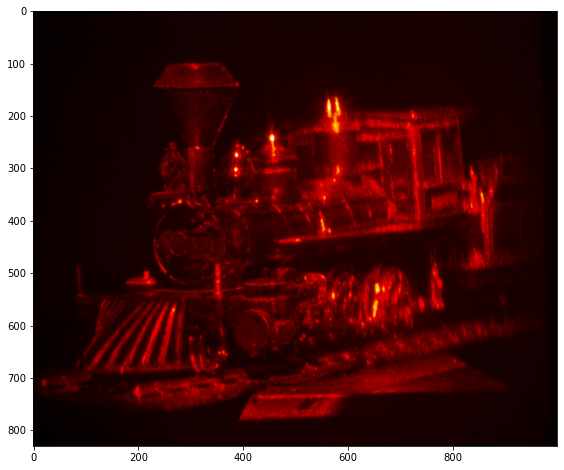

In [81]:
def load_transform(image):
    # implemented this transform for a lightfield capturated in a 90º angle (rotated) that was far away
    # to process the rotation and crop before resize is applied, not after to preserve resolution. 
    # also applies a 0.9º rotation to correct the image. 
    new_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    angle= .9
    image_center = tuple(np.array(new_image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    new_image = cv2.warpAffine(new_image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

    new_image = new_image[2570:3400, 1450:2450]
    return new_image

sample = np.uint8(Image.open(image_paths[100]))
sample = load_transform(sample)

plt.figure(figsize= (10, 8))
plt.imshow(sample)

In [82]:
lf = load_lightfield_from_paths(image_paths[:2*imgs_per_line], imgs_per_line, resize=(572*2, 440*2), transform= load_transform)
print("loaded lightfield with shape", lf.shape, "and dtype", lf.dtype)
DisplayLF(lf, width= 572, height= 440).show()

100%|██████████| 58/58 [00:22<00:00,  2.60it/s]


loaded lightfield with shape (2, 29, 880, 1144, 3) and dtype uint8


In [120]:
from ipywidgets import IntSlider, FloatSlider, HBox, VBox, Output
from ipywidgets import Image as IpyImage
from ipycanvas import Canvas
from PIL import Image
import io
import numpy as np
import cv2

#this has to be defined before DisplayLF
# out = Output(layout={'border': '1px solid black', 'width': '200px', 'height': '140px'}) 
out = Output(layout={'border': '1px solid black'})

class DisplayLF(Canvas):
    def __init__(self, lf, width= None, height= None, sensitivity=2):
        """
        Initialize with a lightfield in np.uint8 format.
        Optionally pass width and height of the canvas and sensitivity to the mouse.
        """
        super().__init__(size=(width, height))
        
        # Adjustable dimensions of the canvas and mouse sensitivity
        self.width = width or lf.shape[-2]
        self.height = height or lf.shape[-3]
        self.dim = lf.ndim
        self.sensitivity = sensitivity
        self.display_image = IpyImage()
        out_width = width//2
        out_height = 3*height//(4)
        slider_height = height - out_height
        self.out = Output(layout={'border': '1px solid black', 'width': f'{out_width}px', 'height': f'{out_height}px'})
        
        # Prepare the lightfields to be rendered with the self.draw function()
        self.lf = self.convert_lf(lf)
        self.downsampled_lf = self.downsample_lf(self.lf)
        
        if self.dim == 6:
            self.u_min, self.u_max = 0, self.lf.shape[1]-1
            self.v_min, self.v_max = 0, self.lf.shape[2]-1
            self.z_min, self.z_max = 0, self.lf.shape[0]-1
        elif self.dim == 5:
            self.u_min, self.u_max = 0, self.lf.shape[0]-1
            self.v_min, self.v_max = 0, self.lf.shape[1]-1
            self.z_min, self.z_max = 0, 0
        elif self.dim == 4:
            self.u_min, self.u_max = 0, 0
            self.v_min, self.v_max = 0, 0
            self.z_min, self.z_max = 0, self.lf.shape[0]-1
        else:
            raise Exception("unexpected number of dimensions for lightfield")
        
        self.slider = IntSlider(min=0, max=self.z_max, value=0, description= 'Z',
                               layout={'width': '', 'height': f'{slider_height}px',
                                       'flex-flow': 'column', 'align-self': 'left'})
        self.slider.observe(self.handle_zoom_change, names='value')

        self.dragging = False
        self.x_mouse = None
        self.y_mouse = None
        
        self.u_idx = self.u_max//2
        self.v_idx = self.v_max//2
        self.z_idx = 0
        
        #Initialize state
        self.draw()
            
        self.on_mouse_down(self.mouse_down_handler)
        self.on_mouse_move(self.mouse_move_handler)
        self.on_mouse_up(self.mouse_up_handler)
        self.on_mouse_out(self.mouse_out_handler)
        
    @property
    def caption_uv_position(self):
        return f"u_idx = {int(self.u_idx)}\tv_idx = {int(self.v_idx)}"
        
    @property
    def caption_zoom(self):
        return f"z_idx = {self.z_idx}"
    
    @property
    def position(self):
        if self.dim >= 6:
            return tuple((int(self.z_idx), int(self.u_idx), int(self.v_idx)))
        elif self.dim == 5:
            return tuple((int(self.u_idx), int(self.v_idx)))
        elif self.dim == 4:
            return int(self.z_idx)
        else:
            raise Exception("unexpected dimensionality while obtaining display position")
    def convert_lf(self, lf):
        """
        Converts lightfield to np.uint8 with a white background and no alpha channel.
        """
        lf = np.float32(lf)
        if np.max(lf) > 1:
            lf = lf/256
        lf = np.uint8(lf*256)
        
        if lf.shape[-1] > 3:
            lf[lf[:,:,:,:,3] == 0] = (255,255,255,0) #convert alpha to white. 
            lf = lf[:,:,:,:,:3]
        # while lf.ndim < 6:
            # lf = np.expand_dims(lf, 0)
            
        lf = resize_lightfield(lf, (self.width, self.height))    
        return lf
    
    def downsample_lf(self, converted_lf):
        """
        Creates a downsampled version of the lightfield for fast rendering when dragging
        """
        #For simplicity, we use every xth and yth pixel, instead of more complicated downsampling methods.
        DOWNSAMPLE_DIMS = (150, 150) # make output shape of each image less than these dimensions. 
        step_size_x = int(converted_lf.shape[2]/DOWNSAMPLE_DIMS[0])+1
        step_size_y = int(converted_lf.shape[2]/DOWNSAMPLE_DIMS[0])+1
        
        return converted_lf[...,::step_size_x, ::step_size_y, :]
    
    def show(self):
        return HBox((self, VBox((self.out, self.slider))))

    def draw(self):
        # Log u,v indices in canvas
        with self.out:
            self.out.clear_output()
            self._print_state()
        
        # Select image data from lightfields
        if self.dragging:
            img_data = self.downsampled_lf[self.position]
        else:
            img_data = self.lf[self.position]
        
        # Write to canvas
        self.display_image.value = numpy_to_image_widget_value(img_data)
        self.draw_image(self.display_image, 0, 0, self.width, self.height)

    def mouse_down_handler(self, pixel_x, pixel_y):
        self.dragging = True
        self.x_mouse = pixel_x
        self.y_mouse = pixel_y

    def mouse_move_handler(self, pixel_x, pixel_y):
        if self.dragging:
            delta_x = pixel_x-self.x_mouse
            delta_y = pixel_y-self.y_mouse
            
            self.x_mouse = pixel_x
            self.y_mouse = pixel_y
            delta_u = (delta_y*self.u_max/self.height)*self.sensitivity
            delta_v = (delta_x*self.v_max/self.width)*self.sensitivity
            
            self.u_idx = np.clip(delta_u + self.u_idx, self.u_min, self.u_max)
            self.v_idx = np.clip(-delta_v + self.v_idx, self.v_min, self.v_max)
            
            self.draw()
    
    def mouse_up_handler(self, pixel_x, pixel_y):
        if self.dragging:
            self.dragging = False
            self.draw()
    
    def mouse_out_handler(self, pixel_x, pixel_y):
        if self.dragging:
            self.dragging = False
            self.draw()
        self.mouse_move_handler(pixel_x, pixel_y)
        
    def handle_zoom_change(self, change):
        self.z_idx = change.new
        with self.out:
            self.out.clear_output()
            self._print_state()
        self.draw()
            
    def _print_state(self):
        with self.out:
            print(self.caption_uv_position)
            print(self.caption_zoom)
        
def numpy_to_image_widget_value(data, format="png", quality=75):
    buffer = io.BytesIO()
    image = Image.fromarray(data)
    image.save(buffer, format= format, quality= quality)
    return buffer.getvalue()

def resize_lightfield(raw_lightfield, desired_size): # -> lightfield
    """
    Applies cv2.resize to each image of the lightfield (6-dim)
    input:
    raw_lightfield to be resized
    desired_size of images in the output in width X height tuple format
    output:
    lightfield with appropiate image size
    """
    if raw_lightfield.ndim == 6:
        n_depth, n_cols, n_rows, *_ = raw_lightfield.shape
        output_lightfield = np.empty([n_depth, n_cols, n_rows] + list(desired_size)[::-1] + [3], dtype=np.uint8)


        for k, depth in enumerate(raw_lightfield):
            for i, row in enumerate(depth):
                for j, image_data in enumerate(row):
                    resized_image_data = cv2.resize(image_data, desired_size)
                    output_lightfield[k, i, j] = resized_image_data
    elif raw_lightfield.ndim == 5:
        n_cols, n_rows, *_ = raw_lightfield.shape
        output_lightfield = np.empty([n_cols, n_rows] + list(desired_size)[::-1] + [3], dtype=np.uint8)


        for i, row in enumerate(raw_lightfield):
            for j, image_data in enumerate(row):
                resized_image_data = cv2.resize(image_data, desired_size)
                output_lightfield[i, j] = resized_image_data
        
    elif raw_lightfield.ndim == 4:
        n_rows, *_ = raw_lightfield.shape
        output_lightfield = np.empty([n_rows] + list(desired_size)[::-1] + [3], dtype=np.uint8)

        for j, image_data in enumerate(raw_lightfield):
            resized_image_data = cv2.resize(image_data, desired_size)
            output_lightfield[j] = resized_image_data
                
    return output_lightfield

In [135]:
src1 = np.load("raw_benton_lightfield_2021_05_12_19_35.npy")[:20,:20,:600,:800]
src2 = np.load("raw_benton_lightfield_2021_05_12_19_53.npy")[:20,:20,100:700,200:1000]

DisplayLF(np.array([src1, src2]), 400, 400).show()